# import libraries

In [1]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import itertools
import string
import matplotlib.patches
import glob
import matplotlib.gridspec
import scipy.ndimage

import wrf
import netCDF4
import cmocean

import pandas

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy
import cartopy.io.shapereader

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [2]:
run_info = 'FMAASO'
skip_time=0

# opening mean fields

## control data

In [3]:
!ls /beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/

001			001_MYNN25_scheme	  001_UW_scheme
001_ACM2_scheme		001_MYNN30_scheme	  001_UW_scheme_10days
001_ACM2_scheme_10days	001_MYNN30_scheme_10days  001_with_extras
001_MYJ_scheme		001_TEMF_scheme		  001_with_xkzs
001_MYJ_scheme_10days	001_TEMF_scheme_10days	  001_with_xkzs_and_fxpbls


YSU, ACM2, MYJ, and UW

In [4]:
ysu_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/001_with_extras'
ysu_file_list = sorted(glob.glob(ysu_root_dir+'/'+'wrfout*'))
ysu_ds_list = [netCDF4.Dataset(file) for file in ysu_file_list]

ysu_ptot_400 = numpy.load('DATA_ptot_400_sensitivity.npy')
ysu_geopot_400 = numpy.load('DATA_geopot_400_sensitivity.npy')
ysu_tk_400 = numpy.load('DATA_tk_400_sensitivity.npy')

ysu_cont_mfds = xarray.open_mfdataset(ysu_root_dir + '/' + 'wrfout*')

ysu_time = ysu_cont_mfds['Times'].values
ysu_xlat = ysu_cont_mfds['XLAT'].values[0,:,:]
ysu_xlong = ysu_cont_mfds['XLONG'].values[0,:,:]
ysu_landmask = ysu_cont_mfds['LANDMASK'].values[0,:,:]

ysu_qvapor_400 = ysu_cont_mfds['QVAPOR'].values
ysu_t_400 = ysu_cont_mfds['T'].values
ysu_pblh_400 = ysu_cont_mfds['PBLH'].values

In [5]:
ysu_cldfra_400 = ysu_cont_mfds['CLDFRA'].values

In [6]:
ysu_rainc_400 = ysu_cont_mfds['RAINC'].values
ysu_rainnc_400 = ysu_cont_mfds['RAINNC'].values

In [7]:
acm2_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/001_ACM2_scheme'
acm2_file_list = sorted(glob.glob(acm2_root_dir+'/'+'wrfout*'))
acm2_ds_list = [netCDF4.Dataset(file) for file in acm2_file_list]

acm2_ptot_400 = wrf.getvar(acm2_ds_list, 'p', timeidx=wrf.ALL_TIMES).values
acm2_geopot_400 = wrf.getvar(acm2_ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
acm2_tk_400 = wrf.getvar(acm2_ds_list, 'tk', timeidx=wrf.ALL_TIMES).values

In [8]:
acm2_cont_mfds = xarray.open_mfdataset(acm2_root_dir + '/' + 'wrfout*')
acm2_qvapor_400 = acm2_cont_mfds['QVAPOR'].values
acm2_t_400 = acm2_cont_mfds['T'].values
acm2_pblh_400 = acm2_cont_mfds['PBLH'].values
acm2_cldfra_400 = acm2_cont_mfds['CLDFRA'].values

In [74]:
acm2_rainc_400 = acm2_cont_mfds['RAINC'].values
acm2_rainnc_400 = acm2_cont_mfds['RAINNC'].values

In [75]:
myj_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/001_MYJ_scheme'
myj_file_list = sorted(glob.glob(myj_root_dir+'/'+'wrfout*'))
myj_ds_list = [netCDF4.Dataset(file) for file in myj_file_list]

myj_ptot_400 = wrf.getvar(myj_ds_list, 'p', timeidx=wrf.ALL_TIMES).values
myj_geopot_400 = wrf.getvar(myj_ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
myj_tk_400 = wrf.getvar(myj_ds_list, 'tk', timeidx=wrf.ALL_TIMES).values

In [76]:
myj_cont_mfds = xarray.open_mfdataset(myj_root_dir + '/' + 'wrfout*')
myj_qvapor_400 = myj_cont_mfds['QVAPOR'].values
myj_t_400 = myj_cont_mfds['T'].values
myj_pblh_400 = myj_cont_mfds['PBLH'].values
myj_cldfra_400 = myj_cont_mfds['CLDFRA'].values

In [77]:
myj_rainc_400 = myj_cont_mfds['RAINC'].values
myj_rainnc_400 = myj_cont_mfds['RAINNC'].values

In [78]:
uw_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/001_UW_scheme'
uw_file_list = sorted(glob.glob(uw_root_dir+'/'+'wrfout*'))
uw_ds_list = [netCDF4.Dataset(file) for file in uw_file_list]

uw_ptot_400 = wrf.getvar(uw_ds_list, 'p', timeidx=wrf.ALL_TIMES).values
uw_geopot_400 = wrf.getvar(uw_ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
uw_tk_400 = wrf.getvar(uw_ds_list, 'tk', timeidx=wrf.ALL_TIMES).values

In [79]:
uw_cont_mfds = xarray.open_mfdataset(uw_root_dir + '/' + 'wrfout*')
uw_qvapor_400 = uw_cont_mfds['QVAPOR'].values
uw_t_400 = uw_cont_mfds['T'].values
uw_pblh_400 = uw_cont_mfds['PBLH'].values
uw_cldfra_400 = uw_cont_mfds['CLDFRA'].values

In [80]:
uw_rainc_400 = uw_cont_mfds['RAINC'].values
uw_rainnc_400 = uw_cont_mfds['RAINNC'].values

In [81]:
mynn25_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/001_MYNN25_scheme'
mynn25_file_list = sorted(glob.glob(mynn25_root_dir+'/'+'wrfout*'))
mynn25_ds_list = [netCDF4.Dataset(file) for file in mynn25_file_list]

mynn25_ptot_400 = wrf.getvar(mynn25_ds_list, 'p', timeidx=wrf.ALL_TIMES).values
mynn25_geopot_400 = wrf.getvar(mynn25_ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
mynn25_tk_400 = wrf.getvar(mynn25_ds_list, 'tk', timeidx=wrf.ALL_TIMES).values

In [82]:
mynn25_cont_mfds = xarray.open_mfdataset(mynn25_root_dir + '/' + 'wrfout*')
mynn25_qvapor_400 = mynn25_cont_mfds['QVAPOR'].values
mynn25_t_400 = mynn25_cont_mfds['T'].values
mynn25_pblh_400 = mynn25_cont_mfds['PBLH'].values
mynn25_cldfra_400 = mynn25_cont_mfds['CLDFRA'].values

In [83]:
mynn25_rainc_400 = mynn25_cont_mfds['RAINC'].values
mynn25_rainnc_400 = mynn25_cont_mfds['RAINNC'].values

In [84]:
mynn30_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/001_MYNN30_scheme'
mynn30_file_list = sorted(glob.glob(mynn30_root_dir+'/'+'wrfout*'))
mynn30_ds_list = [netCDF4.Dataset(file) for file in mynn30_file_list]

mynn30_ptot_400 = wrf.getvar(mynn30_ds_list, 'p', timeidx=wrf.ALL_TIMES).values
mynn30_geopot_400 = wrf.getvar(mynn30_ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
mynn30_tk_400 = wrf.getvar(mynn30_ds_list, 'tk', timeidx=wrf.ALL_TIMES).values

In [85]:
mynn30_cont_mfds = xarray.open_mfdataset(mynn30_root_dir + '/' + 'wrfout*')
mynn30_qvapor_400 = mynn30_cont_mfds['QVAPOR'].values
mynn30_t_400 = mynn30_cont_mfds['T'].values
mynn30_pblh_400 = mynn30_cont_mfds['PBLH'].values
mynn30_cldfra_400 = mynn30_cont_mfds['CLDFRA'].values

In [86]:
mynn30_rainc_400 = mynn30_cont_mfds['RAINC'].values
mynn30_rainnc_400 = mynn30_cont_mfds['RAINNC'].values

In [87]:
temf_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/001_TEMF_scheme'
temf_file_list = sorted(glob.glob(temf_root_dir+'/'+'wrfout*'))
temf_ds_list = [netCDF4.Dataset(file) for file in temf_file_list]

temf_ptot_400 = wrf.getvar(temf_ds_list, 'p', timeidx=wrf.ALL_TIMES).values
temf_geopot_400 = wrf.getvar(temf_ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
temf_tk_400 = wrf.getvar(temf_ds_list, 'tk', timeidx=wrf.ALL_TIMES).values

In [88]:
temf_cont_mfds = xarray.open_mfdataset(temf_root_dir + '/' + 'wrfout*')
temf_qvapor_400 = temf_cont_mfds['QVAPOR'].values
temf_t_400 = temf_cont_mfds['T'].values
temf_pblh_400 = temf_cont_mfds['PBLH'].values
temf_cldfra_400 = temf_cont_mfds['CLDFRA'].values

In [89]:
temf_rainc_400 = temf_cont_mfds['RAINC'].values
temf_rainnc_400 = temf_cont_mfds['RAINNC'].values

## phys data

In [90]:
ysu_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000_sensitivity/001_with_extras'
ysu_file_list = sorted(glob.glob(ysu_root_dir+'/'+'wrfout*'))
ysu_ds_list = [netCDF4.Dataset(file) for file in ysu_file_list]

ysu_ptot_1000 = numpy.load('DATA_ptot_1000_sensitivity.npy')
ysu_geopot_1000 = numpy.load('DATA_geopot_1000_sensitivity.npy')
ysu_tk_1000 = numpy.load('DATA_tk_1000_sensitivity.npy')

ysu_phys_mfds = xarray.open_mfdataset(ysu_root_dir + '/' + 'wrfout*')
ysu_qvapor_1000 = ysu_phys_mfds['QVAPOR'].values
ysu_t_1000 = ysu_phys_mfds['T'].values
ysu_pblh_1000 = ysu_phys_mfds['PBLH'].values

In [91]:
ysu_cldfra_1000 = ysu_phys_mfds['CLDFRA'].values

In [92]:
ysu_rainc_1000 = ysu_phys_mfds['RAINC'].values
ysu_rainnc_1000 = ysu_phys_mfds['RAINNC'].values

In [93]:
acm2_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000_sensitivity/001_ACM2_scheme'
acm2_file_list = sorted(glob.glob(acm2_root_dir+'/'+'wrfout*'))
acm2_ds_list = [netCDF4.Dataset(file) for file in acm2_file_list]

acm2_ptot_1000 = wrf.getvar(acm2_ds_list, 'p', timeidx=wrf.ALL_TIMES).values
acm2_geopot_1000 = wrf.getvar(acm2_ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
acm2_tk_1000 = wrf.getvar(acm2_ds_list, 'tk', timeidx=wrf.ALL_TIMES).values

In [94]:
acm2_phys_mfds = xarray.open_mfdataset(acm2_root_dir + '/' + 'wrfout*')
acm2_qvapor_1000 = acm2_phys_mfds['QVAPOR'].values
acm2_t_1000 = acm2_phys_mfds['T'].values
acm2_pblh_1000 = acm2_phys_mfds['PBLH'].values
acm2_cldfra_1000 = acm2_phys_mfds['CLDFRA'].values

In [95]:
acm2_rainc_1000 = acm2_phys_mfds['RAINC'].values
acm2_rainnc_1000 = acm2_phys_mfds['RAINNC'].values

In [96]:
myj_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000_sensitivity/001_MYJ_scheme'
myj_file_list = sorted(glob.glob(myj_root_dir+'/'+'wrfout*'))
myj_ds_list = [netCDF4.Dataset(file) for file in myj_file_list]

myj_ptot_1000 = wrf.getvar(myj_ds_list, 'p', timeidx=wrf.ALL_TIMES).values
myj_geopot_1000 = wrf.getvar(myj_ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
myj_tk_1000 = wrf.getvar(myj_ds_list, 'tk', timeidx=wrf.ALL_TIMES).values

In [97]:
myj_phys_mfds = xarray.open_mfdataset(myj_root_dir + '/' + 'wrfout*')
myj_qvapor_1000 = myj_phys_mfds['QVAPOR'].values
myj_t_1000 = myj_phys_mfds['T'].values
myj_pblh_1000 = myj_phys_mfds['PBLH'].values
myj_cldfra_1000 = myj_phys_mfds['CLDFRA'].values

In [98]:
myj_rainc_1000 = myj_phys_mfds['RAINC'].values
myj_rainnc_1000 = myj_phys_mfds['RAINNC'].values

In [99]:
uw_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000_sensitivity/001_UW_scheme'
uw_file_list = sorted(glob.glob(uw_root_dir+'/'+'wrfout*'))
uw_ds_list = [netCDF4.Dataset(file) for file in uw_file_list]

uw_ptot_1000 = wrf.getvar(uw_ds_list, 'p', timeidx=wrf.ALL_TIMES).values
uw_geopot_1000 = wrf.getvar(uw_ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
uw_tk_1000 = wrf.getvar(uw_ds_list, 'tk', timeidx=wrf.ALL_TIMES).values

In [100]:
uw_phys_mfds = xarray.open_mfdataset(uw_root_dir + '/' + 'wrfout*')
uw_qvapor_1000 = uw_phys_mfds['QVAPOR'].values
uw_t_1000 = uw_phys_mfds['T'].values
uw_pblh_1000 = uw_phys_mfds['PBLH'].values
uw_cldfra_1000 = uw_phys_mfds['CLDFRA'].values

In [101]:
uw_rainc_1000 = uw_phys_mfds['RAINC'].values
uw_rainnc_1000 = uw_phys_mfds['RAINNC'].values

In [102]:
mynn25_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000_sensitivity/001_MYNN25_scheme'
mynn25_file_list = sorted(glob.glob(mynn25_root_dir+'/'+'wrfout*'))
mynn25_ds_list = [netCDF4.Dataset(file) for file in mynn25_file_list]

mynn25_ptot_1000 = wrf.getvar(mynn25_ds_list, 'p', timeidx=wrf.ALL_TIMES).values
mynn25_geopot_1000 = wrf.getvar(mynn25_ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
mynn25_tk_1000 = wrf.getvar(mynn25_ds_list, 'tk', timeidx=wrf.ALL_TIMES).values

In [103]:
mynn25_phys_mfds = xarray.open_mfdataset(mynn25_root_dir + '/' + 'wrfout*')
mynn25_qvapor_1000 = mynn25_phys_mfds['QVAPOR'].values
mynn25_t_1000 = mynn25_phys_mfds['T'].values
mynn25_pblh_1000 = mynn25_phys_mfds['PBLH'].values
mynn25_cldfra_1000 = mynn25_phys_mfds['CLDFRA'].values

In [104]:
mynn25_rainc_1000 = mynn25_phys_mfds['RAINC'].values
mynn25_rainnc_1000 = mynn25_phys_mfds['RAINNC'].values

In [105]:
mynn30_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000_sensitivity/001_MYNN30_scheme'
mynn30_file_list = sorted(glob.glob(mynn30_root_dir+'/'+'wrfout*'))
mynn30_ds_list = [netCDF4.Dataset(file) for file in mynn30_file_list]

mynn30_ptot_1000 = wrf.getvar(mynn30_ds_list, 'p', timeidx=wrf.ALL_TIMES).values
mynn30_geopot_1000 = wrf.getvar(mynn30_ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
mynn30_tk_1000 = wrf.getvar(mynn30_ds_list, 'tk', timeidx=wrf.ALL_TIMES).values

In [106]:
mynn30_phys_mfds = xarray.open_mfdataset(mynn30_root_dir + '/' + 'wrfout*')
mynn30_qvapor_1000 = mynn30_phys_mfds['QVAPOR'].values
mynn30_t_1000 = mynn30_phys_mfds['T'].values
mynn30_pblh_1000 = mynn30_phys_mfds['PBLH'].values
mynn30_cldfra_1000 = mynn30_phys_mfds['CLDFRA'].values

In [107]:
mynn30_rainc_1000 = mynn30_phys_mfds['RAINC'].values
mynn30_rainnc_1000 = mynn30_phys_mfds['RAINNC'].values

In [108]:
temf_root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000_sensitivity/001_TEMF_scheme'
temf_file_list = sorted(glob.glob(temf_root_dir+'/'+'wrfout*'))
temf_ds_list = [netCDF4.Dataset(file) for file in temf_file_list]

temf_ptot_1000 = wrf.getvar(temf_ds_list, 'p', timeidx=wrf.ALL_TIMES).values
temf_geopot_1000 = wrf.getvar(temf_ds_list, 'geopotential', timeidx=wrf.ALL_TIMES).values
temf_tk_1000 = wrf.getvar(temf_ds_list, 'tk', timeidx=wrf.ALL_TIMES).values

In [109]:
temf_phys_mfds = xarray.open_mfdataset(temf_root_dir + '/' + 'wrfout*')
temf_qvapor_1000 = temf_phys_mfds['QVAPOR'].values
temf_t_1000 = temf_phys_mfds['T'].values
temf_pblh_1000 = temf_phys_mfds['PBLH'].values
temf_cldfra_1000 = temf_phys_mfds['CLDFRA'].values

In [110]:
temf_rainc_1000 = temf_phys_mfds['RAINC'].values
temf_rainnc_1000 = temf_phys_mfds['RAINNC'].values

## define dx, dy

In [111]:
dx = 50000. # 50,000 m or 50 km
dy = 50000.

# constants

In [112]:
L_v = 2264705.0 # J/kg
c_p = 1005.7 # J/kgK
g = 9.80665 # m/s2

## get landmask

In [113]:
landmask = ysu_cont_mfds['LANDMASK'].sel(Time=0).values

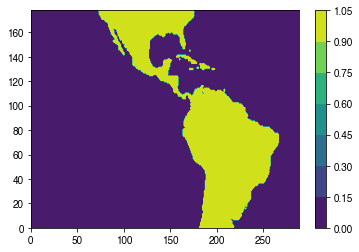

In [114]:
mp.contourf(landmask);mp.colorbar()

# calculate MSE

In [115]:
ysu_mse_400 = ysu_geopot_400 + L_v*ysu_qvapor_400 + c_p*ysu_tk_400
ysu_mse_1000 = ysu_geopot_1000 + L_v*ysu_qvapor_1000 + c_p*ysu_tk_1000

set up time/lev numbers

In [116]:
ntime = 25
nlev = 29

calculate lat lon stuff

In [117]:
dry_lon_lo, dry_lon_hi, dry_lat_lo, dry_lat_hi = -60,-50,-10,10
wet_lon_lo, wet_lon_hi, wet_lat_lo, wet_lat_hi = -80,-75,-10,10

dry_lon_lo_degE = 360+dry_lon_lo
dry_lon_hi_degE = 360+dry_lon_hi

wet_lon_lo_degE = 360+wet_lon_lo
wet_lon_hi_degE = 360+wet_lon_hi

In [118]:
lon_lo = dry_lon_lo
lon_hi = dry_lon_hi
lat_lo = dry_lat_lo
lat_hi = dry_lat_hi

# lon_lo = wet_lon_lo
# lon_hi = wet_lon_hi
# lat_lo = wet_lat_lo
# lat_hi = wet_lat_hi

In [119]:
landmask_indices = numpy.copy(landmask)
landmask_indices[landmask==1]=1
landmask_indices[landmask!=1]=0
landmask_indices = numpy.array(landmask_indices, dtype=bool)

In [120]:
lon_indices = (ysu_xlong>=lon_lo)&(ysu_xlong<=lon_hi)
lat_indices = (ysu_xlat>=lat_lo)&(ysu_xlat<=lat_hi)
latlon_indices = (lon_indices)&(lat_indices)&(landmask_indices)

# take latlon means

pblh, deltaysu

In [121]:
ysu_pblh_400_latlon_mean = numpy.nanmean(ysu_pblh_400[:,latlon_indices], axis=1)
ysu_pblh_1000_latlon_mean = numpy.nanmean(ysu_pblh_1000[:,latlon_indices], axis=1)

ysu_qvapor_400_latlon_mean = numpy.nanmean(ysu_qvapor_400[:,:,latlon_indices], axis=2)
ysu_qvapor_1000_latlon_mean = numpy.nanmean(ysu_qvapor_1000[:,:,latlon_indices], axis=2)

ysu_tk_400_latlon_mean = numpy.nanmean(ysu_tk_400[:,:,latlon_indices], axis=2)
ysu_tk_1000_latlon_mean = numpy.nanmean(ysu_tk_1000[:,:,latlon_indices], axis=2)

ysu_cldfra_400_latlon_mean = numpy.nanmean(ysu_cldfra_400[:,:,latlon_indices], axis=2)
ysu_cldfra_1000_latlon_mean = numpy.nanmean(ysu_cldfra_1000[:,:,latlon_indices], axis=2)

In [122]:
ysu_raintot_400 = ysu_rainc_400 + ysu_rainnc_400
ysu_raintot_1000 = ysu_rainc_1000 + ysu_rainnc_1000

In [123]:
myj_pblh_400_latlon_mean = numpy.nanmean(myj_pblh_400[:,latlon_indices], axis=1)
myj_pblh_1000_latlon_mean = numpy.nanmean(myj_pblh_1000[:,latlon_indices], axis=1)

myj_qvapor_400_latlon_mean = numpy.nanmean(myj_qvapor_400[:,:,latlon_indices], axis=2)
myj_qvapor_1000_latlon_mean = numpy.nanmean(myj_qvapor_1000[:,:,latlon_indices], axis=2)

myj_tk_400_latlon_mean = numpy.nanmean(myj_tk_400[:,:,latlon_indices], axis=2)
myj_tk_1000_latlon_mean = numpy.nanmean(myj_tk_1000[:,:,latlon_indices], axis=2)

myj_cldfra_400_latlon_mean = numpy.nanmean(myj_cldfra_400[:,:,latlon_indices], axis=2)
myj_cldfra_1000_latlon_mean = numpy.nanmean(myj_cldfra_1000[:,:,latlon_indices], axis=2)

In [124]:
myj_raintot_400 = myj_rainc_400 + myj_rainnc_400
myj_raintot_1000 = myj_rainc_1000 + myj_rainnc_1000

In [125]:
acm2_pblh_400_latlon_mean = numpy.nanmean(acm2_pblh_400[:,latlon_indices], axis=1)
acm2_pblh_1000_latlon_mean = numpy.nanmean(acm2_pblh_1000[:,latlon_indices], axis=1)

acm2_qvapor_400_latlon_mean = numpy.nanmean(acm2_qvapor_400[:,:,latlon_indices], axis=2)
acm2_qvapor_1000_latlon_mean = numpy.nanmean(acm2_qvapor_1000[:,:,latlon_indices], axis=2)

acm2_tk_400_latlon_mean = numpy.nanmean(acm2_tk_400[:,:,latlon_indices], axis=2)
acm2_tk_1000_latlon_mean = numpy.nanmean(acm2_tk_1000[:,:,latlon_indices], axis=2)

acm2_cldfra_400_latlon_mean = numpy.nanmean(acm2_cldfra_400[:,:,latlon_indices], axis=2)
acm2_cldfra_1000_latlon_mean = numpy.nanmean(acm2_cldfra_1000[:,:,latlon_indices], axis=2)

In [126]:
acm2_raintot_400 = acm2_rainc_400 + acm2_rainnc_400
acm2_raintot_1000 = acm2_rainc_1000 + acm2_rainnc_1000

In [127]:
uw_pblh_400_latlon_mean = numpy.nanmean(uw_pblh_400[:,latlon_indices], axis=1)
uw_pblh_1000_latlon_mean = numpy.nanmean(uw_pblh_1000[:,latlon_indices], axis=1)

uw_qvapor_400_latlon_mean = numpy.nanmean(uw_qvapor_400[:,:,latlon_indices], axis=2)
uw_qvapor_1000_latlon_mean = numpy.nanmean(uw_qvapor_1000[:,:,latlon_indices], axis=2)

uw_tk_400_latlon_mean = numpy.nanmean(uw_tk_400[:,:,latlon_indices], axis=2)
uw_tk_1000_latlon_mean = numpy.nanmean(uw_tk_1000[:,:,latlon_indices], axis=2)

uw_cldfra_400_latlon_mean = numpy.nanmean(uw_cldfra_400[:,:,latlon_indices], axis=2)
uw_cldfra_1000_latlon_mean = numpy.nanmean(uw_cldfra_1000[:,:,latlon_indices], axis=2)

In [128]:
uw_raintot_400 = uw_rainc_400 + uw_rainnc_400
uw_raintot_1000 = uw_rainc_1000 + uw_rainnc_1000

In [129]:
mynn25_pblh_400_latlon_mean = numpy.nanmean(mynn25_pblh_400[:,latlon_indices], axis=1)
mynn25_pblh_1000_latlon_mean = numpy.nanmean(mynn25_pblh_1000[:,latlon_indices], axis=1)

mynn25_qvapor_400_latlon_mean = numpy.nanmean(mynn25_qvapor_400[:,:,latlon_indices], axis=2)
mynn25_qvapor_1000_latlon_mean = numpy.nanmean(mynn25_qvapor_1000[:,:,latlon_indices], axis=2)

mynn25_tk_400_latlon_mean = numpy.nanmean(mynn25_tk_400[:,:,latlon_indices], axis=2)
mynn25_tk_1000_latlon_mean = numpy.nanmean(mynn25_tk_1000[:,:,latlon_indices], axis=2)

mynn25_cldfra_400_latlon_mean = numpy.nanmean(mynn25_cldfra_400[:,:,latlon_indices], axis=2)
mynn25_cldfra_1000_latlon_mean = numpy.nanmean(mynn25_cldfra_1000[:,:,latlon_indices], axis=2)

In [130]:
mynn25_raintot_400 = mynn25_rainc_400 + mynn25_rainnc_400
mynn25_raintot_1000 = mynn25_rainc_1000 + mynn25_rainnc_1000

In [131]:
mynn30_pblh_400_latlon_mean = numpy.nanmean(mynn30_pblh_400[:,latlon_indices], axis=1)
mynn30_pblh_1000_latlon_mean = numpy.nanmean(mynn30_pblh_1000[:,latlon_indices], axis=1)

mynn30_qvapor_400_latlon_mean = numpy.nanmean(mynn30_qvapor_400[:,:,latlon_indices], axis=2)
mynn30_qvapor_1000_latlon_mean = numpy.nanmean(mynn30_qvapor_1000[:,:,latlon_indices], axis=2)

mynn30_tk_400_latlon_mean = numpy.nanmean(mynn30_tk_400[:,:,latlon_indices], axis=2)
mynn30_tk_1000_latlon_mean = numpy.nanmean(mynn30_tk_1000[:,:,latlon_indices], axis=2)

mynn30_cldfra_400_latlon_mean = numpy.nanmean(mynn30_cldfra_400[:,:,latlon_indices], axis=2)
mynn30_cldfra_1000_latlon_mean = numpy.nanmean(mynn30_cldfra_1000[:,:,latlon_indices], axis=2)

In [132]:
mynn30_raintot_400 = mynn30_rainc_400 + mynn30_rainnc_400
mynn30_raintot_1000 = mynn30_rainc_1000 + mynn30_rainnc_1000

In [133]:
temf_pblh_400_latlon_mean = numpy.nanmean(temf_pblh_400[:,latlon_indices], axis=1)
temf_pblh_1000_latlon_mean = numpy.nanmean(temf_pblh_1000[:,latlon_indices], axis=1)

temf_qvapor_400_latlon_mean = numpy.nanmean(temf_qvapor_400[:,:,latlon_indices], axis=2)
temf_qvapor_1000_latlon_mean = numpy.nanmean(temf_qvapor_1000[:,:,latlon_indices], axis=2)

temf_tk_400_latlon_mean = numpy.nanmean(temf_tk_400[:,:,latlon_indices], axis=2)
temf_tk_1000_latlon_mean = numpy.nanmean(temf_tk_1000[:,:,latlon_indices], axis=2)

temf_cldfra_400_latlon_mean = numpy.nanmean(temf_cldfra_400[:,:,latlon_indices], axis=2)
temf_cldfra_1000_latlon_mean = numpy.nanmean(temf_cldfra_1000[:,:,latlon_indices], axis=2)

In [134]:
temf_raintot_400 = temf_rainc_400 + temf_rainnc_400
temf_raintot_1000 = temf_rainc_1000 + temf_rainnc_1000

raintot time means

In [135]:
ysu_raintot_400_hourly = numpy.diff(ysu_raintot_400, axis=0)
ysu_raintot_1000_hourly = numpy.diff(ysu_raintot_1000, axis=0)

ysu_raintot_hourly_diffs = ysu_raintot_1000_hourly-ysu_raintot_400_hourly

ysu_raintot_hourly_diffs_timemean = numpy.nanmean(ysu_raintot_hourly_diffs, axis=0)

ysu_raintot_diffs = ysu_raintot_1000[-1,:,:]-ysu_raintot_400[-1,:,:]

ysu_raintot_400_time_mean = numpy.nanmean(ysu_raintot_400, axis=0)
ysu_raintot_1000_time_mean = numpy.nanmean(ysu_raintot_1000, axis=0)

# calculate diffs

In [136]:
ysu_tk_diffs_latlon_mean = ysu_tk_1000_latlon_mean - ysu_tk_400_latlon_mean
ysu_qvapor_diffs_latlon_mean = ysu_qvapor_1000_latlon_mean - ysu_qvapor_400_latlon_mean
ysu_cldfra_diffs_latlon_mean = ysu_cldfra_1000_latlon_mean - ysu_cldfra_400_latlon_mean

In [138]:
myj_tk_diffs_latlon_mean = myj_tk_1000_latlon_mean - myj_tk_400_latlon_mean
myj_qvapor_diffs_latlon_mean = myj_qvapor_1000_latlon_mean - myj_qvapor_400_latlon_mean
myj_cldfra_diffs_latlon_mean = myj_cldfra_1000_latlon_mean - myj_cldfra_400_latlon_mean

In [139]:
acm2_tk_diffs_latlon_mean = acm2_tk_1000_latlon_mean - acm2_tk_400_latlon_mean
acm2_qvapor_diffs_latlon_mean = acm2_qvapor_1000_latlon_mean - acm2_qvapor_400_latlon_mean
acm2_cldfra_diffs_latlon_mean = acm2_cldfra_1000_latlon_mean - acm2_cldfra_400_latlon_mean

In [140]:
uw_tk_diffs_latlon_mean = uw_tk_1000_latlon_mean - uw_tk_400_latlon_mean
uw_qvapor_diffs_latlon_mean = uw_qvapor_1000_latlon_mean - uw_qvapor_400_latlon_mean
uw_cldfra_diffs_latlon_mean = uw_cldfra_1000_latlon_mean - uw_cldfra_400_latlon_mean

In [141]:
mynn25_tk_diffs_latlon_mean = mynn25_tk_1000_latlon_mean - mynn25_tk_400_latlon_mean
mynn25_qvapor_diffs_latlon_mean = mynn25_qvapor_1000_latlon_mean - mynn25_qvapor_400_latlon_mean
mynn25_cldfra_diffs_latlon_mean = mynn25_cldfra_1000_latlon_mean - mynn25_cldfra_400_latlon_mean

In [142]:
mynn30_tk_diffs_latlon_mean = mynn30_tk_1000_latlon_mean - mynn30_tk_400_latlon_mean
mynn30_qvapor_diffs_latlon_mean = mynn30_qvapor_1000_latlon_mean - mynn30_qvapor_400_latlon_mean
mynn30_cldfra_diffs_latlon_mean = mynn30_cldfra_1000_latlon_mean - mynn30_cldfra_400_latlon_mean

In [143]:
temf_tk_diffs_latlon_mean = temf_tk_1000_latlon_mean - temf_tk_400_latlon_mean
temf_qvapor_diffs_latlon_mean = temf_qvapor_1000_latlon_mean - temf_qvapor_400_latlon_mean
temf_cldfra_diffs_latlon_mean = temf_cldfra_1000_latlon_mean - temf_cldfra_400_latlon_mean

# plots

In [144]:
ysu_ptot_400_latlon_time_mean = numpy.nanmean(ysu_ptot_400[:,:,latlon_indices], axis=(0,2))
ysu_geopot_400_latlon_time_mean = numpy.nanmean(ysu_geopot_400[:,:,latlon_indices], axis=(0,2))

myj_ptot_400_latlon_time_mean = numpy.nanmean(myj_ptot_400[:,:,latlon_indices], axis=(0,2))
myj_geopot_400_latlon_time_mean = numpy.nanmean(myj_geopot_400[:,:,latlon_indices], axis=(0,2))

acm2_ptot_400_latlon_time_mean = numpy.nanmean(acm2_ptot_400[:,:,latlon_indices], axis=(0,2))
acm2_geopot_400_latlon_time_mean = numpy.nanmean(acm2_geopot_400[:,:,latlon_indices], axis=(0,2))

uw_ptot_400_latlon_time_mean = numpy.nanmean(uw_ptot_400[:,:,latlon_indices], axis=(0,2))
uw_geopot_400_latlon_time_mean = numpy.nanmean(uw_geopot_400[:,:,latlon_indices], axis=(0,2))

mynn25_ptot_400_latlon_time_mean = numpy.nanmean(mynn25_ptot_400[:,:,latlon_indices], axis=(0,2))
mynn25_geopot_400_latlon_time_mean = numpy.nanmean(mynn25_geopot_400[:,:,latlon_indices], axis=(0,2))

mynn30_ptot_400_latlon_time_mean = numpy.nanmean(mynn30_ptot_400[:,:,latlon_indices], axis=(0,2))
mynn30_geopot_400_latlon_time_mean = numpy.nanmean(mynn30_geopot_400[:,:,latlon_indices], axis=(0,2))

temf_ptot_400_latlon_time_mean = numpy.nanmean(temf_ptot_400[:,:,latlon_indices], axis=(0,2))
temf_geopot_400_latlon_time_mean = numpy.nanmean(temf_geopot_400[:,:,latlon_indices], axis=(0,2))

In [145]:
ysu_xx, ysu_pp = numpy.meshgrid(numpy.arange(ntime), ysu_ptot_400_latlon_time_mean)
ysu_xx_geopot, ysu_gg = numpy.meshgrid(numpy.arange(ntime), ysu_geopot_400_latlon_time_mean)

myj_xx, myj_pp = numpy.meshgrid(numpy.arange(ntime), myj_ptot_400_latlon_time_mean)
myj_xx_geopot, myj_gg = numpy.meshgrid(numpy.arange(ntime), myj_geopot_400_latlon_time_mean)

acm2_xx, acm2_pp = numpy.meshgrid(numpy.arange(ntime), acm2_ptot_400_latlon_time_mean)
acm2_xx_geopot, acm2_gg = numpy.meshgrid(numpy.arange(ntime), acm2_geopot_400_latlon_time_mean)

uw_xx, uw_pp = numpy.meshgrid(numpy.arange(ntime), uw_ptot_400_latlon_time_mean)
uw_xx_geopot, uw_gg = numpy.meshgrid(numpy.arange(ntime), uw_geopot_400_latlon_time_mean)

mynn25_xx, mynn25_pp = numpy.meshgrid(numpy.arange(ntime), mynn25_ptot_400_latlon_time_mean)
mynn25_xx_geopot, mynn25_gg = numpy.meshgrid(numpy.arange(ntime), mynn25_geopot_400_latlon_time_mean)

mynn30_xx, mynn30_pp = numpy.meshgrid(numpy.arange(ntime), mynn30_ptot_400_latlon_time_mean)
mynn30_xx_geopot, mynn30_gg = numpy.meshgrid(numpy.arange(ntime), mynn30_geopot_400_latlon_time_mean)

temf_xx, temf_pp = numpy.meshgrid(numpy.arange(ntime), temf_ptot_400_latlon_time_mean)
temf_xx_geopot, temf_gg = numpy.meshgrid(numpy.arange(ntime), temf_geopot_400_latlon_time_mean)

for qvapor

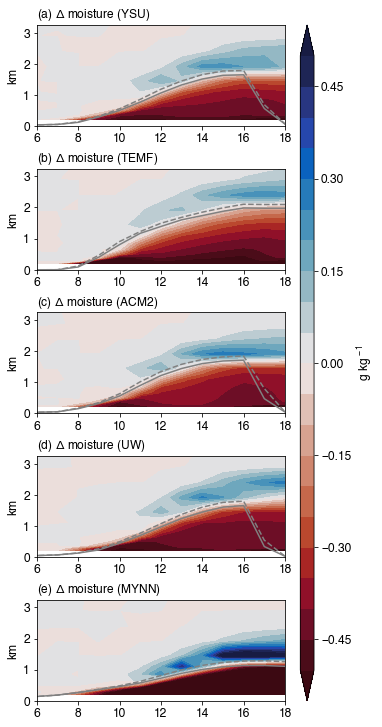

In [146]:
fontsize = 12

fig = mp.figure(figsize=(4.25,10))
levels = numpy.arange(-0.5,0.51,0.05)


ax1 = fig.add_subplot(511)
ax1.tick_params(labelsize=fontsize)
contour_plot1 = ax1.contourf(ysu_xx_geopot-4, ysu_gg/9.81/1000., \
                             ysu_qvapor_diffs_latlon_mean.T*1000., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)

ax1.plot(ysu_xx_geopot[0,:]-4, ysu_pblh_400_latlon_mean/1000., c='0.5')
ax1.plot(ysu_xx_geopot[0,:]-4, ysu_pblh_1000_latlon_mean/1000., c='0.5', ls='--')
ax1.set_ylim(0,3.25)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_ylabel('km', fontsize=fontsize)

ax2 = fig.add_subplot(512)
ax2.tick_params(labelsize=fontsize)
contour_plot2 = ax2.contourf(temf_xx_geopot-4, temf_gg/9.81/1000., \
                             temf_qvapor_diffs_latlon_mean.T*1000., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax2.set_ylim(0,3.25)
ax2.set_xlim(6,18)
ax2.set_ylabel('km', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.plot(temf_xx_geopot[0,:]-4, temf_pblh_400_latlon_mean/1000., c='0.5')
ax2.plot(temf_xx_geopot[0,:]-4, temf_pblh_1000_latlon_mean/1000., c='0.5', ls='--')


ax3 = fig.add_subplot(513)
ax3.tick_params(labelsize=fontsize)
contour_plot2 = ax3.contourf(acm2_xx_geopot-4, acm2_gg/9.81/1000., \
                             acm2_qvapor_diffs_latlon_mean.T*1000., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax3.set_ylim(0,3.25)
ax3.set_xlim(6,18)
ax3.set_ylabel('km', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.plot(acm2_xx_geopot[0,:]-4, acm2_pblh_400_latlon_mean/1000., c='0.5')
ax3.plot(acm2_xx_geopot[0,:]-4, acm2_pblh_1000_latlon_mean/1000., c='0.5', ls='--')


ax4 = fig.add_subplot(514)
ax4.tick_params(labelsize=fontsize)
contour_plot2 = ax4.contourf(uw_xx_geopot-4, uw_gg/9.81/1000., \
                             uw_qvapor_diffs_latlon_mean.T*1000., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax4.set_ylim(0,3.25)
ax4.set_xlim(6,18)
ax4.set_ylabel('km', fontsize=fontsize)
ax4.set_xticks([i for i in range(6,19,2)])
ax4.plot(uw_xx_geopot[0,:]-4, uw_pblh_400_latlon_mean/1000., c='0.5')
ax4.plot(uw_xx_geopot[0,:]-4, uw_pblh_1000_latlon_mean/1000., c='0.5', ls='--')

ax5 = fig.add_subplot(515)
ax5.tick_params(labelsize=fontsize)
contour_plot5 = ax5.contourf(mynn30_xx_geopot-4, uw_gg/9.81/1000., \
                             mynn30_qvapor_diffs_latlon_mean.T*1000., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax5.set_ylim(0,3.25)
ax5.set_xlim(6,18)
ax5.set_ylabel('km', fontsize=fontsize)
ax5.set_xticks([i for i in range(6,19,2)])
ax5.plot(uw_xx_geopot[0,:]-4, mynn30_pblh_400_latlon_mean/1000., c='0.5')
ax5.plot(uw_xx_geopot[0,:]-4, mynn30_pblh_1000_latlon_mean/1000., c='0.5', ls='--')

ax1.text(s='(a) $\Delta$ moisture (YSU)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) $\Delta$ moisture (TEMF)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) $\Delta$ moisture (ACM2)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)
ax4.text(s='(d) $\Delta$ moisture (UW)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)
ax5.text(s='(e) $\Delta$ moisture (MYNN)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax5.transAxes)

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
ax2pos = ax5.get_position()
cbar_ax = fig.add_axes([ax2pos.x1+0.05, ax2pos.y0, 0.045, ax1pos.y1-ax2pos.y0])
cbar = fig.colorbar(contour_plot1, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)

#fig.savefig('figures/qvapor_diffs_PBL_schemes.png', dpi=600, bbox_inches='tight', transparent=True)

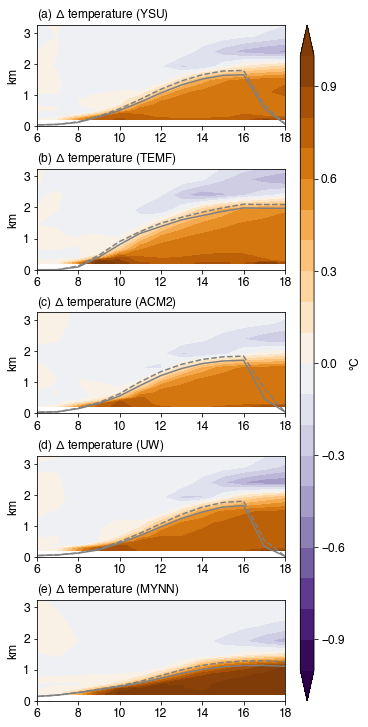

In [147]:
fontsize = 12

fig = mp.figure(figsize=(4.25,10))
levels = numpy.arange(-1,1.1,0.1)


ax1 = fig.add_subplot(511)
ax1.tick_params(labelsize=fontsize)
contour_plot1 = ax1.contourf(ysu_xx_geopot-4, ysu_gg/9.81/1000., \
                             ysu_tk_diffs_latlon_mean.T, \
                             cmap='PuOr_r', extend='both', levels=levels)

ax1.plot(ysu_xx_geopot[0,:]-4, ysu_pblh_400_latlon_mean/1000., c='0.5')
ax1.plot(ysu_xx_geopot[0,:]-4, ysu_pblh_1000_latlon_mean/1000., c='0.5', ls='--')
ax1.set_ylim(0,3.25)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])
ax1.set_ylabel('km', fontsize=fontsize)

ax2 = fig.add_subplot(512)
ax2.tick_params(labelsize=fontsize)
contour_plot2 = ax2.contourf(temf_xx_geopot-4, temf_gg/9.81/1000., \
                             temf_tk_diffs_latlon_mean.T, \
                             cmap='PuOr_r', extend='both', levels=levels)
ax2.set_ylim(0,3.25)
ax2.set_xlim(6,18)
ax2.set_ylabel('km', fontsize=fontsize)
ax2.set_xticks([i for i in range(6,19,2)])
ax2.plot(temf_xx_geopot[0,:]-4, temf_pblh_400_latlon_mean/1000., c='0.5')
ax2.plot(temf_xx_geopot[0,:]-4, temf_pblh_1000_latlon_mean/1000., c='0.5', ls='--')


ax3 = fig.add_subplot(513)
ax3.tick_params(labelsize=fontsize)
contour_plot2 = ax3.contourf(acm2_xx_geopot-4, acm2_gg/9.81/1000., \
                             acm2_tk_diffs_latlon_mean.T, \
                             cmap='PuOr_r', extend='both', levels=levels)
ax3.set_ylim(0,3.25)
ax3.set_xlim(6,18)
ax3.set_ylabel('km', fontsize=fontsize)
ax3.set_xticks([i for i in range(6,19,2)])
ax3.plot(acm2_xx_geopot[0,:]-4, acm2_pblh_400_latlon_mean/1000., c='0.5')
ax3.plot(acm2_xx_geopot[0,:]-4, acm2_pblh_1000_latlon_mean/1000., c='0.5', ls='--')


ax4 = fig.add_subplot(514)
ax4.tick_params(labelsize=fontsize)
contour_plot2 = ax4.contourf(uw_xx_geopot-4, uw_gg/9.81/1000., \
                             uw_tk_diffs_latlon_mean.T, \
                             cmap='PuOr_r', extend='both', levels=levels)
ax4.set_ylim(0,3.25)
ax4.set_xlim(6,18)
ax4.set_ylabel('km', fontsize=fontsize)
ax4.set_xticks([i for i in range(6,19,2)])
ax4.plot(uw_xx_geopot[0,:]-4, uw_pblh_400_latlon_mean/1000., c='0.5')
ax4.plot(uw_xx_geopot[0,:]-4, uw_pblh_1000_latlon_mean/1000., c='0.5', ls='--')

ax5 = fig.add_subplot(515)
ax5.tick_params(labelsize=fontsize)
contour_plot5 = ax5.contourf(mynn30_xx_geopot-4, uw_gg/9.81/1000., \
                             mynn30_tk_diffs_latlon_mean.T, \
                             cmap='PuOr_r', extend='both', levels=levels)
ax5.set_ylim(0,3.25)
ax5.set_xlim(6,18)
ax5.set_ylabel('km', fontsize=fontsize)
ax5.set_xticks([i for i in range(6,19,2)])
ax5.plot(uw_xx_geopot[0,:]-4, mynn30_pblh_400_latlon_mean/1000., c='0.5')
ax5.plot(uw_xx_geopot[0,:]-4, mynn30_pblh_1000_latlon_mean/1000., c='0.5', ls='--')

ax1.text(s='(a) $\Delta$ temperature (YSU)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) $\Delta$ temperature (TEMF)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) $\Delta$ temperature (ACM2)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)
ax4.text(s='(d) $\Delta$ temperature (UW)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)
ax5.text(s='(e) $\Delta$ temperature (MYNN)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax5.transAxes)

fig.tight_layout(h_pad=2)

ax1pos = ax1.get_position()
ax2pos = ax5.get_position()
cbar_ax = fig.add_axes([ax2pos.x1+0.05, ax2pos.y0, 0.045, ax1pos.y1-ax2pos.y0])
cbar = fig.colorbar(contour_plot1, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('$\degree$C', fontsize=fontsize)

#fig.savefig('figures/tk_diffs_PBL_schemes.png', dpi=600, bbox_inches='tight', transparent=True)

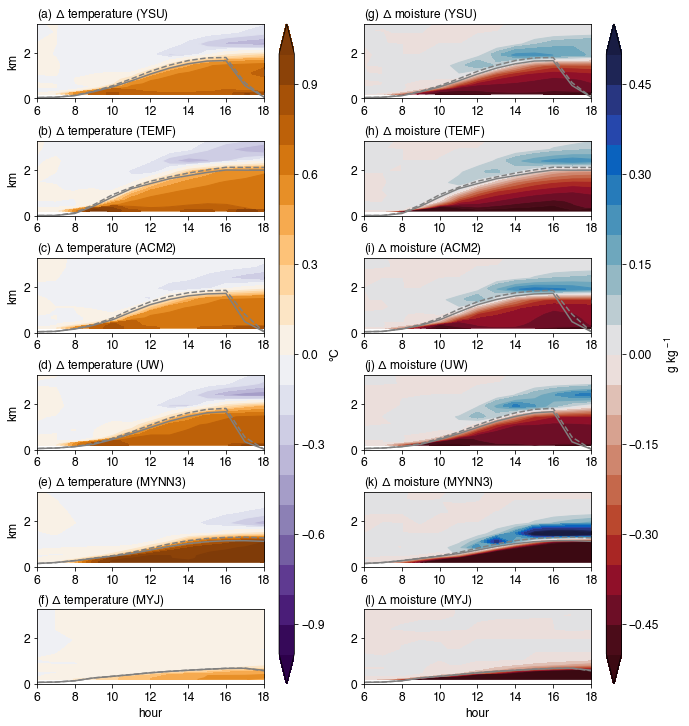

In [149]:
fontsize = 12

fig = mp.figure(figsize=(8.5,10))
levels = numpy.arange(-1,1.1,0.1)


ax1 = fig.add_subplot(6,2,1)
ax1.tick_params(labelsize=fontsize)
contour_plot1 = ax1.contourf(ysu_xx_geopot-4, ysu_gg/9.81/1000., \
                             ysu_tk_diffs_latlon_mean.T, \
                             cmap='PuOr_r', extend='both', levels=levels)

ax1.plot(ysu_xx_geopot[0,:]-4, ysu_pblh_400_latlon_mean/1000., c='0.5')
ax1.plot(ysu_xx_geopot[0,:]-4, ysu_pblh_1000_latlon_mean/1000., c='0.5', ls='--')
ax1.set_ylim(0,3.25)
ax1.set_xlim(6,18)
ax1.set_xticks([i for i in range(6,19,2)])

ax2 = fig.add_subplot(6,2,3)
ax2.tick_params(labelsize=fontsize)
contour_plot2 = ax2.contourf(temf_xx_geopot-4, temf_gg/9.81/1000., \
                             temf_tk_diffs_latlon_mean.T, \
                             cmap='PuOr_r', extend='both', levels=levels)
ax2.set_ylim(0,3.25)
ax2.set_xlim(6,18)

ax2.set_xticks([i for i in range(6,19,2)])
ax2.plot(temf_xx_geopot[0,:]-4, temf_pblh_400_latlon_mean/1000., c='0.5')
ax2.plot(temf_xx_geopot[0,:]-4, temf_pblh_1000_latlon_mean/1000., c='0.5', ls='--')


ax3 = fig.add_subplot(6,2,5)
ax3.tick_params(labelsize=fontsize)
contour_plot3 = ax3.contourf(acm2_xx_geopot-4, acm2_gg/9.81/1000., \
                             acm2_tk_diffs_latlon_mean.T, \
                             cmap='PuOr_r', extend='both', levels=levels)
ax3.set_ylim(0,3.25)
ax3.set_xlim(6,18)

ax3.set_xticks([i for i in range(6,19,2)])
ax3.plot(acm2_xx_geopot[0,:]-4, acm2_pblh_400_latlon_mean/1000., c='0.5')
ax3.plot(acm2_xx_geopot[0,:]-4, acm2_pblh_1000_latlon_mean/1000., c='0.5', ls='--')


ax4 = fig.add_subplot(6,2,7)
ax4.tick_params(labelsize=fontsize)
contour_plot4 = ax4.contourf(uw_xx_geopot-4, uw_gg/9.81/1000., \
                             uw_tk_diffs_latlon_mean.T, \
                             cmap='PuOr_r', extend='both', levels=levels)
ax4.set_ylim(0,3.25)
ax4.set_xlim(6,18)

ax4.set_xticks([i for i in range(6,19,2)])
ax4.plot(uw_xx_geopot[0,:]-4, uw_pblh_400_latlon_mean/1000., c='0.5')
ax4.plot(uw_xx_geopot[0,:]-4, uw_pblh_1000_latlon_mean/1000., c='0.5', ls='--')

ax5 = fig.add_subplot(6,2,9)
ax5.tick_params(labelsize=fontsize)
contour_plot5 = ax5.contourf(mynn30_xx_geopot-4, uw_gg/9.81/1000., \
                             mynn30_tk_diffs_latlon_mean.T, \
                             cmap='PuOr_r', extend='both', levels=levels)
ax5.set_ylim(0,3.25)
ax5.set_xlim(6,18)

ax5.set_xticks([i for i in range(6,19,2)])
ax5.plot(uw_xx_geopot[0,:]-4, mynn30_pblh_400_latlon_mean/1000., c='0.5')
ax5.plot(uw_xx_geopot[0,:]-4, mynn30_pblh_1000_latlon_mean/1000., c='0.5', ls='--')

ax6 = fig.add_subplot(6,2,11)
ax6.tick_params(labelsize=fontsize)
contour_plot6 = ax6.contourf(myj_xx_geopot-4, uw_gg/9.81/1000., \
                             myj_tk_diffs_latlon_mean.T, \
                             cmap='PuOr_r', extend='both', levels=levels)
ax6.set_ylim(0,3.25)
ax6.set_xlim(6,18)
ax6.set_xticks([i for i in range(6,19,2)])
ax6.plot(uw_xx_geopot[0,:]-4, myj_pblh_400_latlon_mean/1000., c='0.5')
ax6.plot(uw_xx_geopot[0,:]-4, myj_pblh_1000_latlon_mean/1000., c='0.5', ls='--')

ax1.text(s='(a) $\Delta$ temperature (YSU)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes)
ax2.text(s='(b) $\Delta$ temperature (TEMF)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes)
ax3.text(s='(c) $\Delta$ temperature (ACM2)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes)
ax4.text(s='(d) $\Delta$ temperature (UW)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes)
ax5.text(s='(e) $\Delta$ temperature (MYNN3)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax5.transAxes)
ax5.text(s='(f) $\Delta$ temperature (MYJ)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax6.transAxes)

ax1.set_ylabel('km', fontsize=fontsize)
ax2.set_ylabel('km', fontsize=fontsize)
ax3.set_ylabel('km', fontsize=fontsize)
ax4.set_ylabel('km', fontsize=fontsize)
ax5.set_ylabel('km', fontsize=fontsize)
#fig.tight_layout(h_pad=2)

#=================================================================

levels = numpy.arange(-0.5,0.51,0.05)

ax12 = fig.add_subplot(6,2,2)
ax12.tick_params(labelsize=fontsize)
contour_plot12 = ax12.contourf(ysu_xx_geopot-4, ysu_gg/9.81/1000., \
                             ysu_qvapor_diffs_latlon_mean.T*1000., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)

ax12.plot(ysu_xx_geopot[0,:]-4, ysu_pblh_400_latlon_mean/1000., c='0.5')
ax12.plot(ysu_xx_geopot[0,:]-4, ysu_pblh_1000_latlon_mean/1000., c='0.5', ls='--')
ax12.set_ylim(0,3.25)
ax12.set_xlim(6,18)
ax12.set_xticks([i for i in range(6,19,2)])


ax22 = fig.add_subplot(6,2,4)
ax22.tick_params(labelsize=fontsize)
contour_plot22 = ax22.contourf(temf_xx_geopot-4, temf_gg/9.81/1000., \
                             temf_qvapor_diffs_latlon_mean.T*1000., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax22.set_ylim(0,3.25)
ax22.set_xlim(6,18)

ax22.set_xticks([i for i in range(6,19,2)])
ax22.plot(temf_xx_geopot[0,:]-4, temf_pblh_400_latlon_mean/1000., c='0.5')
ax22.plot(temf_xx_geopot[0,:]-4, temf_pblh_1000_latlon_mean/1000., c='0.5', ls='--')


ax32 = fig.add_subplot(6,2,6)
ax32.tick_params(labelsize=fontsize)
contour_plot32 = ax32.contourf(acm2_xx_geopot-4, acm2_gg/9.81/1000., \
                             acm2_qvapor_diffs_latlon_mean.T*1000., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax32.set_ylim(0,3.25)
ax32.set_xlim(6,18)

ax32.set_xticks([i for i in range(6,19,2)])
ax32.plot(acm2_xx_geopot[0,:]-4, acm2_pblh_400_latlon_mean/1000., c='0.5')
ax32.plot(acm2_xx_geopot[0,:]-4, acm2_pblh_1000_latlon_mean/1000., c='0.5', ls='--')


ax42 = fig.add_subplot(6,2,8)
ax42.tick_params(labelsize=fontsize)
contour_plot42 = ax42.contourf(uw_xx_geopot-4, uw_gg/9.81/1000., \
                             uw_qvapor_diffs_latlon_mean.T*1000., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax42.set_ylim(0,3.25)
ax42.set_xlim(6,18)

ax42.set_xticks([i for i in range(6,19,2)])
ax42.plot(uw_xx_geopot[0,:]-4, uw_pblh_400_latlon_mean/1000., c='0.5')
ax42.plot(uw_xx_geopot[0,:]-4, uw_pblh_1000_latlon_mean/1000., c='0.5', ls='--')

ax52 = fig.add_subplot(6,2,10)
ax52.tick_params(labelsize=fontsize)
contour_plot52 = ax52.contourf(mynn30_xx_geopot-4, uw_gg/9.81/1000., \
                             mynn30_qvapor_diffs_latlon_mean.T*1000., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax52.set_ylim(0,3.25)
ax52.set_xlim(6,18)
ax52.set_xticks([i for i in range(6,19,2)])
ax52.plot(uw_xx_geopot[0,:]-4, mynn30_pblh_400_latlon_mean/1000., c='0.5')
ax52.plot(uw_xx_geopot[0,:]-4, mynn30_pblh_1000_latlon_mean/1000., c='0.5', ls='--')

ax62 = fig.add_subplot(6,2,12)
ax62.tick_params(labelsize=fontsize)
contour_plot62 = ax62.contourf(myj_xx_geopot-4, uw_gg/9.81/1000., \
                             myj_qvapor_diffs_latlon_mean.T*1000., \
                             cmap=cmocean.cm.balance_r, extend='both', levels=levels)
ax62.set_ylim(0,3.25)
ax62.set_xlim(6,18)
ax62.set_xticks([i for i in range(6,19,2)])
ax62.plot(uw_xx_geopot[0,:]-4, myj_pblh_400_latlon_mean/1000., c='0.5')
ax62.plot(uw_xx_geopot[0,:]-4, myj_pblh_1000_latlon_mean/1000., c='0.5', ls='--')

ax6.set_xlabel('hour', fontsize=fontsize)
ax62.set_xlabel('hour', fontsize=fontsize)

for c in contour_plot1.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot2.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot3.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot4.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot5.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot6.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot12.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot22.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot32.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot42.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot52.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)
for c in contour_plot62.collections:
    c.set_edgecolor('face')
    c.set_rasterized(True)

ax12.text(s='(g) $\Delta$ moisture (YSU)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax12.transAxes)
ax22.text(s='(h) $\Delta$ moisture (TEMF)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax22.transAxes)
ax32.text(s='(i) $\Delta$ moisture (ACM2)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax32.transAxes)
ax42.text(s='(j) $\Delta$ moisture (UW)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax42.transAxes)
ax52.text(s='(k) $\Delta$ moisture (MYNN3)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax52.transAxes)
ax52.text(s='(l) $\Delta$ moisture (MYJ)', x=0, y=1.02, ha='left', va='bottom', fontsize=fontsize, transform=ax62.transAxes)

fig.tight_layout(h_pad=2, w_pad=8)

ax1pos = ax12.get_position()
ax2pos = ax62.get_position()
cbar_ax = fig.add_axes([ax2pos.x1+0.025, ax2pos.y0, 0.025, ax1pos.y1-ax2pos.y0])
cbar = fig.colorbar(contour_plot52, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)
for c in cbar_ax.collections:
    c.set_edgecolor('face')

ax1pos = ax1.get_position()
ax2pos = ax6.get_position()
cbar_ax = fig.add_axes([ax2pos.x1+0.025, ax2pos.y0, 0.025, ax1pos.y1-ax2pos.y0])
cbar = fig.colorbar(contour_plot1, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('$\degree$C', fontsize=fontsize)
for c in cbar_ax.collections:
    c.set_edgecolor('face')

fig.savefig('../figures/SI_fig09.pdf', dpi=300, bbox_inches='tight', transparent=True)